<a href="https://colab.research.google.com/github/TuringCollegeSubmissions/rfekad-ML.1/blob/master/315.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3: Machine Learning

## Sprint 1: Supervised Machine Learning Fundamentals

## Part 5: Travel Insurance Prediction

## About this Part

Congrats!
You have reached the last Part of this Sprint.
In this Part, you will put what you learned during this and the previous Sprints into practice.
As the final assignment of this Sprint, you will analyse the Travel Insurance Prediction dataset.
You will have to apply all that you have learned about Machine Learning to complete this task.
Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of modeling, statistical testing, and exploration.
You'll have to iteratively try to find patterns in the data, raise hypotheses and use your data analysis skills to get answers.

P.S. we don't expect this project to be perfect - you will continue to improve your skills and there will be many projects for you to apply your newly gained skills in the future.
For now just use what you have learned and try your best!

## Objectives for this Part

- Practice working with CSV files.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using linear machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data using SQL and Pandas.

## Requirements

- Download the data from [Travel Insurance Prediction Data](https://www.kaggle.com/tejashvi14/travel-insurance-prediction-data).
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
- Apply various machine learning models to predict the TravelInsurance column using the other features. This should include hyperparameter tuning, model ensembling, the analysis of model selection, and other methods.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Model's performance. How well did your model perform the predictions?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Correction

During your project correction, you should present it as if talking to a technical team lead and a senior co-worker working in your team.
You can assume that they will have strong data science and software engineering skills - they will understand technical jargon, they are expected to notice things that could have been done better, ask about the choices you've made (especially if you've made some questionable choices).
In addition, be careful not to spend your time explaining trivial concepts or code snippets that are simple - your best bet is to focus your presentation on the more difficult portions of your code.

During a correction, you may get asked questions that test your understanding of covered topics.

- How does hyperparameter tuning work? Why do we use hyperparameter tuning?
- How are random forests trained and used for inference? What are the most important hyperparameters for random forests?
- What are SVMs? What are the most important hyperparameters for SVMs?
- How would you construct a preprocessing pipeline for a random forest model?


## General Correction Guidelines

For an in-depth explanation about how corrections work at Turing College, please read [this doc](https://turingcollege.atlassian.net/wiki/spaces/DLG/pages/537395951/Peer+expert+reviews+corrections).


# Summary

This report presents an analysis of customer data with the objective of predicting the likelihood of customers purchasing travel insurance. The analysis encompasses key customer demographics such as age, annual income, and family size. Machine learning models were evaluated to make these predictions, including logistic regression, decision tree, random forest, and support vector classifier.

Key findings from the analysis include average customer age of approximately 29.7 years, an average annual income of $932,763, and an average family size of 4.75 members. However, discerning a clear relationship between these variables and travel insurance purchase was challenging.

The models' performances varied, with the decision tree and random forest classifiers emerging as top performers, achieving accuracies of 92% and 92.1%, respectively. After hyperparameter tuning, the random forest classifier stood out as the best-performing model on the test data.

The report concludes with suggestions for further research, including feature engineering, addressing class imbalance, exploring advanced modeling techniques, and leveraging external data sources to enhance predictive capabilities.

### Loading Red Wine Quality from Google Drive to Google Colab

In [4]:
! gdown --quiet https://drive.google.com/uc?id=1FXlCR0TUvnij-7Co2nh6_R4kSXaLU3Sk -O /content/TravelInsurancePrediction.csv

### **Importing important Modules**

In [5]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="In a future version")
from scipy.stats import zscore
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


### **Overview of the Data**

In [6]:
df = pd.read_csv(
"/content/TravelInsurancePrediction.csv",
    index_col=False,
)

In [7]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [9]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


### Check if there are any missing values and dublicates in the DataFrame

In [10]:
print(f" There are {int(df.isnull().any().any())} missing values")
print(f"There are {df.duplicated().sum()} duplicates.")

 There are 0 missing values
There are 0 duplicates.


### **Outliers**

In [11]:
numeric_keys_values = {
    "Age": "Age",
    "AnnualIncome": "Annual Income",
    "FamilyMembers": "No. of Family Members",
}
numeric_columns = list(numeric_keys_values.keys())
df_numeric = df[numeric_columns]


In [12]:
z = np.abs(stats.zscore(df_numeric))
outliers = df_numeric[(z > 3).all(axis=1)]

In [13]:
len(outliers)

0

## **Exploratory Data Analysis**

Inorder to do data analysis the data at hand, the following questions should be investigated:

1. Age, Annual Income and Family Member Distribution:
   * What is the distribution of customer ages in comparison to the average age?
   * Are there any significant age-related patterns in the data?
   * How is annual income distributed among the customers?
   * Are there income groups that stand out, and what are their characteristics?
   * What does the distribution of the number of family members look like?
   * Are there patterns related to the size of families?

2. Influence of Age and Annual Income:
   * Do the age and annual income of customers influence their likelihood of buying travel insurance?
   * Are there age or income thresholds that correlate with insurance purchases?

3. Influence of Age, Annual Income, and Family Members:
   * How do age, annual income, and the number of family members collectively influence the likelihood of buying travel insurance?
   * Are there combinations of these factors that strongly affect insurance purchases?

4. Correlation Analysis:
   * Is there a correlation between age, annual income, and the number of family members?
   * Do any of these variables correlate with each other, and if so, how strongly?

5. Categorical Features:
   * Are the different categories within the categorical features (e.g., Employment Type, GraduateOrNot, FrequentFlyer) equally represented in the data?
   * Are there any imbalances or biases in these categories?

6. Income and Travel Insurance:
   * Do customers with higher income levels tend to be more inclined to buy travel insurance?
   * Is there a clear relationship between income and insurance purchases?



### 1. Age, Annual Income and Family Member Distribution

Average Age of Customers is 29.650226472068447


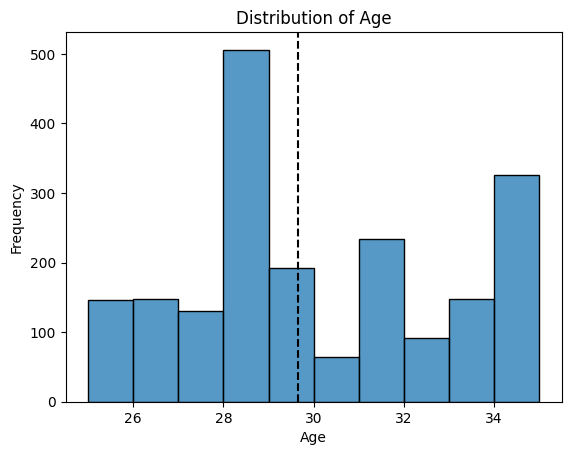

Average Annual Income of Customers is 932762.9592350277


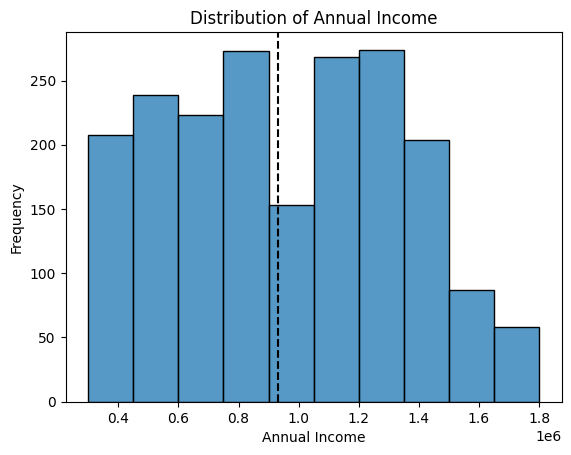

Average No. of Family Members of Customers is 4.752893809763463


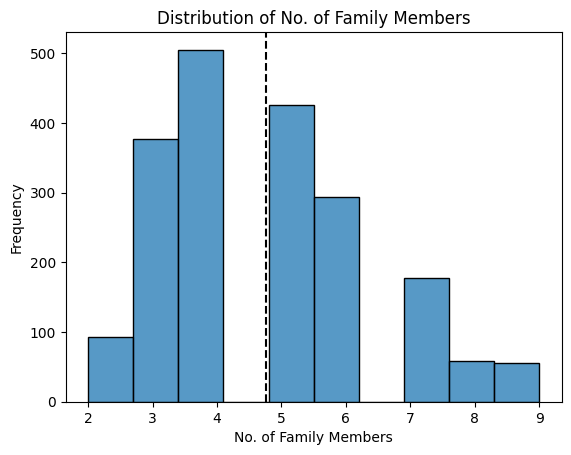

In [14]:
df = df.drop(columns="Unnamed: 0")
for key, value in numeric_keys_values.items():
    Average = df[key].mean()

    ax = sns.histplot(x=key, data=df, bins=10)
    ax.set_xlabel(value)
    ax.set_ylabel("Frequency")
    ax.axvline(Average, color="black", linestyle="--")
    ax.set_title(f"Distribution of {value}")

    print(f"Average {value} of Customers is {Average}")

    plt.show()

## 2. Influence of Age and Annual Income

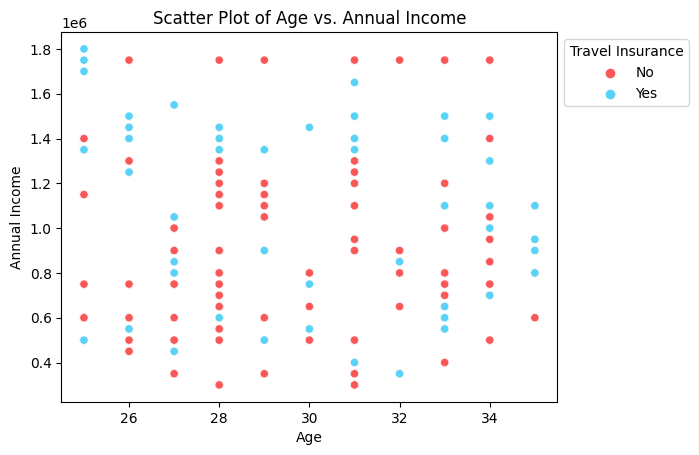

In [15]:
df["TravelInsurance"] = (
    df["TravelInsurance"]
    .astype(str)
    .apply(lambda x: "No" if x == "0" else ("Yes" if x == "1" else "Unknown"))
)
df["ChronicDiseases"] = (
    df["ChronicDiseases"]
    .astype(str)
    .apply(lambda x: "No" if x == "0" else ("Yes" if x == "1" else "Unknown"))
)
pal = ["#FA5858", "#58D3F7"]
sns.scatterplot(x="Age", y="AnnualIncome", data=df, palette=pal, hue="TravelInsurance")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Scatter Plot of Age vs. Annual Income")

plt.legend(title="Travel Insurance")
plt.legend(title="Travel Insurance", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

From the plot above, it's challenging to discern whether there is any relationship between age, annual income, and Travel Insurance.

## 3. Influence of Age, Annual Income, and Family Members

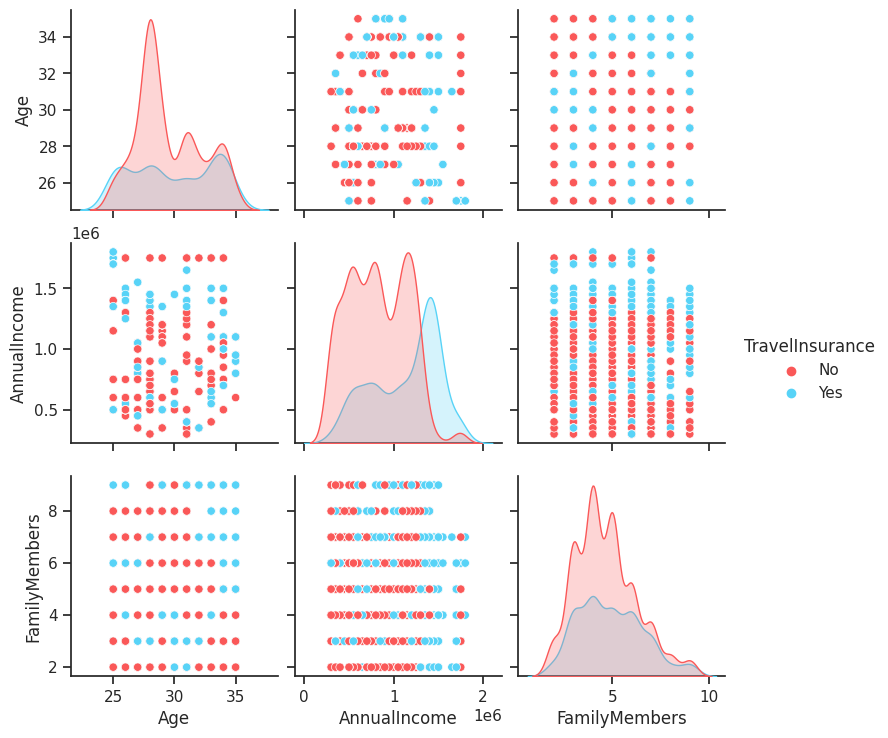

In [16]:
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="TravelInsurance", palette=pal)


In the pair plot above, the relationship between Annual Income and Travel Insurance indicates a slight tendency for customers to purchase Travel Insurance as their annual income increases.

## 4. Correlation Analysis:

In [17]:
df.corr(numeric_only=True)

,Age,AnnualIncome,FamilyMembers
Age,1.000000,-0.020101,0.027409
AnnualIncome,-0.020101,1.000000,-0.015367
FamilyMembers,0.027409,-0.015367,1.000000


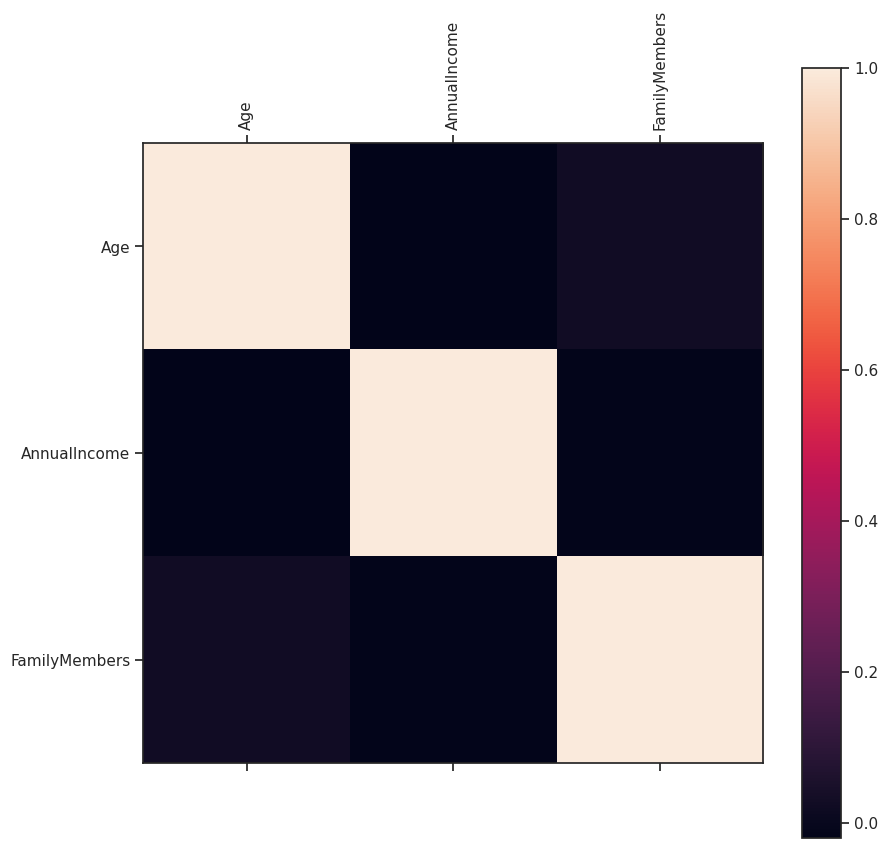

In [18]:
def plot_corr(df, size=10):
    corr = df.corr(numeric_only=True)
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation="vertical")
    plt.yticks(range(len(corr.columns)), corr.columns)


plot_corr(df)

The plot above reveals that there is no significant correlation among age, annual income, and the number of family members.

## 5. Categorical Features

In [19]:
columns_to_drop = list(numeric_columns)
non_numeric_df = df.drop(columns=columns_to_drop)

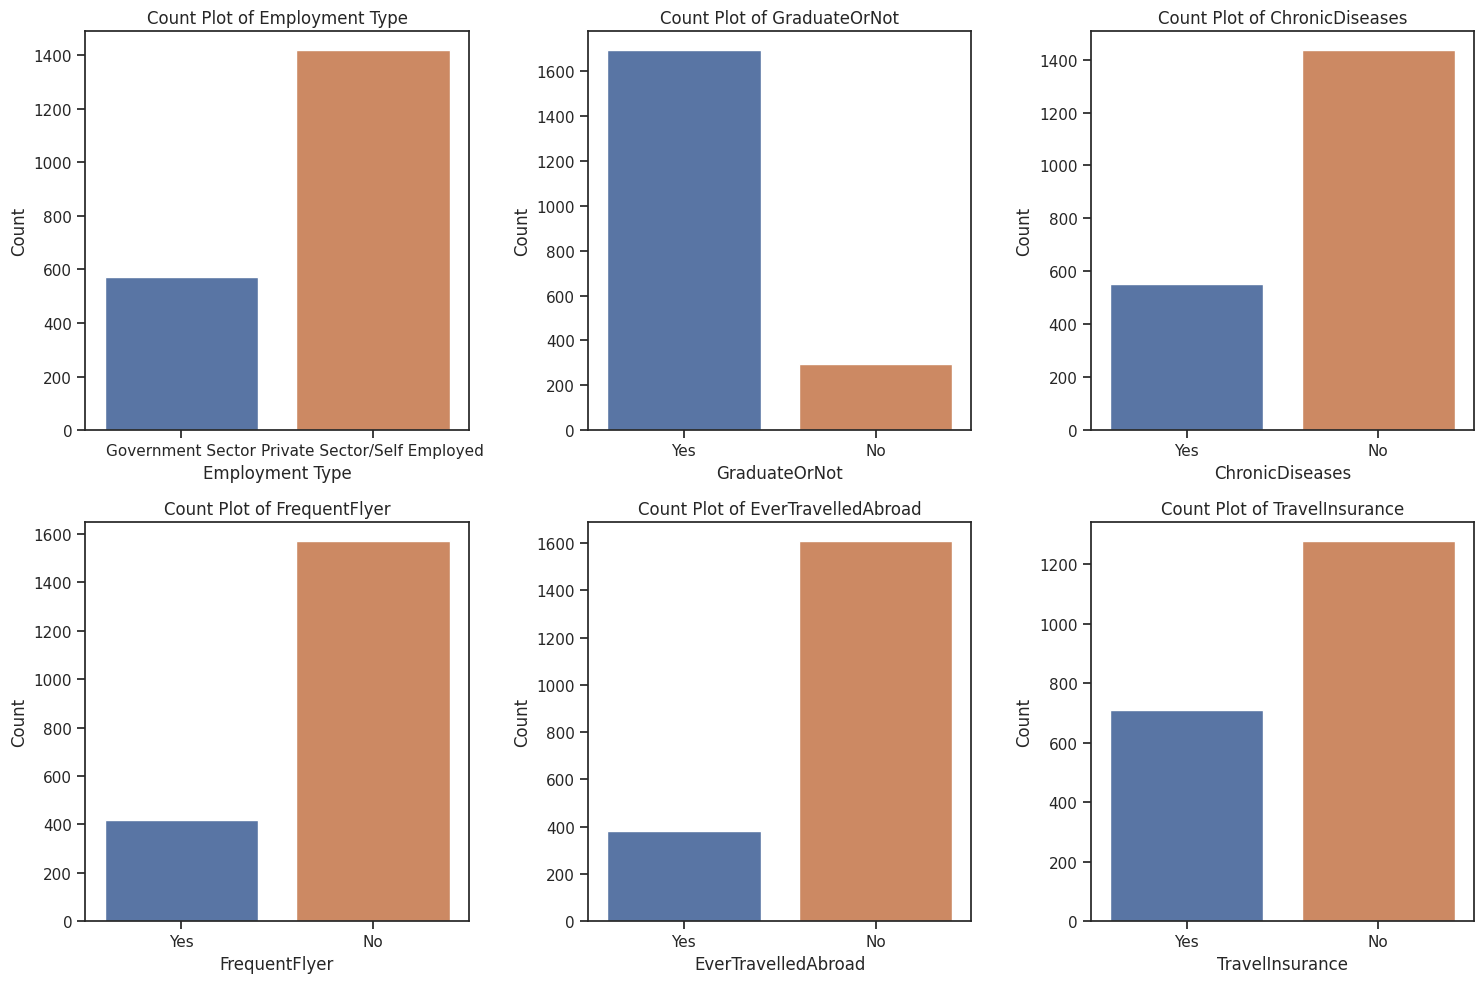

In [20]:
num_plots = len(non_numeric_df.columns)
num_rows = 2
num_cols = 3
category_order = ["Yes", "No"]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(non_numeric_df.columns):
    if column != "Employment Type":
        sns.countplot(x=column, data=non_numeric_df, order=category_order, ax=axes[i])
    else:
        sns.countplot(x=column, data=non_numeric_df, ax=axes[i])
    axes[i].set_title(f"Count Plot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The above plot shows that the recorded observations for different features are not equally represented.

## 6. Income and Travel Insurance

Let's set up:
* Null Hypothesis (H0): The distribution of TravelInsurance is the same across different income levels.

* Alternative Hypothesis (H1): The distribution of TravelInsurance varies across different income levels.

In [21]:
bins = [0, 500000, 1000000, float("inf")]
labels = ["Low", "Medium", "High"]
df["IncomeBin"] = pd.cut(df["AnnualIncome"], bins=bins, labels=labels)

contingency_table = pd.crosstab(
    df["IncomeBin"], df["TravelInsurance"].replace({0: "No", 1: "Yes"})
)

print("Contingency Table:")
print(contingency_table)

chi2, p, _, expected = chi2_contingency(contingency_table)

print("\nChi-square p-value:", p)
print("\nExpected Frequencies:")
print(
    pd.DataFrame(
        expected, columns=contingency_table.columns, index=contingency_table.index
    )
)

if contingency_table.loc["High", "Yes"] > expected[2][1]:
    print("\nFor High income level, the observed frequency of TravelInsurance being 'Yes'")
    print("is greater than the expected frequency.")
else:
    print("\nFor High income level, the observed frequency of TravelInsurance being 'Yes'")
    print("is not greater than the expected frequency.")

if p < 0.05:
    print("\nThe null hypothesis can be rejected at 95% confidence level.")
else:
    print("\nThe null hypothesis cannot be rejected at 95% confidence level.")

Contingency Table:
TravelInsurance   No  Yes
IncomeBin                
Low              306   60
Medium           539  191
High             432  459

Chi-square p-value: 5.631741695996984e-41

Expected Frequencies:
TravelInsurance          No         Yes
IncomeBin                              
Low              235.219930  130.780070
Medium           469.154504  260.845496
High             572.625566  318.374434

For High income level, the observed frequency of TravelInsurance being 'Yes'
is greater than the expected frequency.

The null hypothesis can be rejected at 95% confidence level.


# **Preparing Data for Machine Learning Algorithms**

## **Data Cleaning**

According to our analysis of our data, it is evident that we don't have null or missing values. Therefore, we can skip the proecess of dealing with missing values.

## **Splitting data**

Let's split our data into training and test sets. Let's use 80% for training and  20% for test data.

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["TravelInsurance"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [23]:
X_train = strat_train_set.drop(columns="TravelInsurance", axis=1)
y_train = strat_train_set["TravelInsurance"].copy()

## **Handling Numerical and Categorical Attributes**

In [24]:
df.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeBin
0,31,Government Sector,Yes,400000,6,Yes,No,No,No,Low
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,No,High
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,Yes,Low
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,No,Medium
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,No,Medium


In [25]:
num_attribs = ["Age",	"AnnualIncome",	"FamilyMembers"]
cat_attribs = ["Employment Type",	"GraduateOrNot", "ChronicDiseases",	"FrequentFlyer",
               "EverTravelledAbroad"]

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(X_train)



In [26]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_encoder_categories = cat_encoder.categories_

for col, categories in zip(cat_attribs, cat_encoder_categories):
    print(f"{col} categories:", categories)

Employment Type categories: ['Government Sector' 'Private Sector/Self Employed']
GraduateOrNot categories: ['No' 'Yes']
ChronicDiseases categories: ['No' 'Yes']
FrequentFlyer categories: ['No' 'Yes']
EverTravelledAbroad categories: ['No' 'Yes']


## **Select and Train a Model**

### **Training and Evaluating on the Training Set**

#### **Logistic Regression**

In [27]:
clf = LogisticRegression()
clf.fit(X_prepared, y_train)

joblib.dump(clf, "logistic_model.pkl")

y_train_predictions = clf.predict(X_prepared)
print(clf.__class__.__name__, accuracy_score(y_train, y_train_predictions))
print(classification_report(y_train, y_train_predictions))

LogisticRegression 0.7747010698552549
              precision    recall  f1-score   support

          No       0.77      0.93      0.84      1021
         Yes       0.80      0.49      0.61       568

    accuracy                           0.77      1589
   macro avg       0.78      0.71      0.73      1589
weighted avg       0.78      0.77      0.76      1589



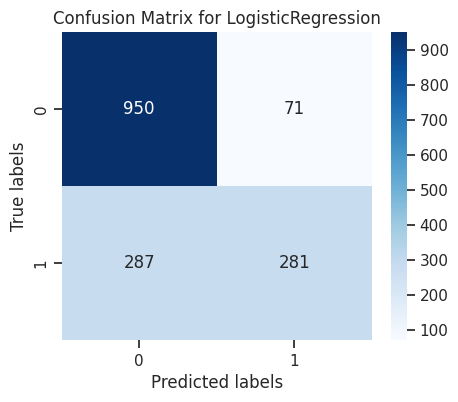

In [28]:
conf_matrix = confusion_matrix(y_train, y_train_predictions)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for " + clf.__class__.__name__)
plt.show()

The logistic regression model achieved an accuracy of 77%, which means it correctly predicted outcomes for 77% of the cases. For the "No" class, it had a high precision of 77% and a high recall of 93%, indicating it was good at correctly identifying "No" cases. However, for the "Yes" class, it had lower recall at 49%, meaning it missed some "Yes" cases. The F1-scores were 0.84 for "No" and 0.61 for "Yes." In summary, the model is better at predicting "No" outcomes than "Yes" outcomes.

#### **Decision Tree**

In [29]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_prepared, y_train)

joblib.dump(tree_clf, "DecisionTreeClassifier_model.pkl")

y_train_predictions = tree_clf.predict(X_prepared)
print(tree_clf.__class__.__name__, accuracy_score(y_train, y_train_predictions))
print(classification_report(y_train, y_train_predictions))

DecisionTreeClassifier 0.920704845814978
              precision    recall  f1-score   support

          No       0.89      0.99      0.94      1021
         Yes       0.98      0.79      0.88       568

    accuracy                           0.92      1589
   macro avg       0.94      0.89      0.91      1589
weighted avg       0.93      0.92      0.92      1589



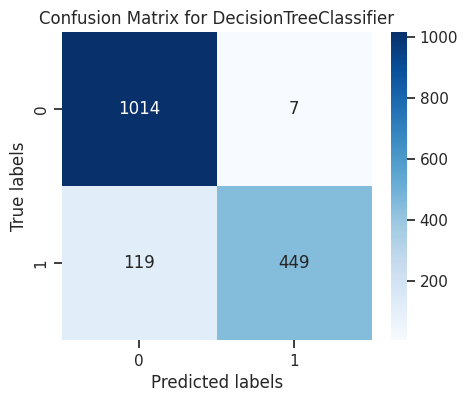

In [30]:
conf_matrix = confusion_matrix(y_train, y_train_predictions)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for " + tree_clf.__class__.__name__)
plt.show()

The Decision Tree Classifier achieved an impressive accuracy of 92%, outperforming the Logistic Regression model's accuracy of 77%. For the "No" class, it demonstrated a high precision of 89% and an even higher recall of 99%, indicating strong performance in correctly identifying "No" cases. Similarly, for the "Yes" class, it showed high precision at 98% and a recall of 79%. The F1-scores were 0.94 for "No" and 0.88 for "Yes." In summary, the Decision Tree model is notably better at predicting both "No" and "Yes" outcomes compared to the Logistic Regression model.

#### **Evaluation of Decision Tree Using Cross-Validation**

In [31]:
y_train_pred = cross_val_predict(tree_clf, X_prepared, y_train, cv=10)
accuracy = accuracy_score(y_train, y_train_pred)

print("Accuracy:", accuracy)
report = classification_report(y_train, y_train_pred)
print("Classification Report:\n", report)

Accuracy: 0.7791063561988673
Classification Report:
               precision    recall  f1-score   support

          No       0.81      0.86      0.83      1021
         Yes       0.71      0.64      0.67       568

    accuracy                           0.78      1589
   macro avg       0.76      0.75      0.75      1589
weighted avg       0.78      0.78      0.78      1589



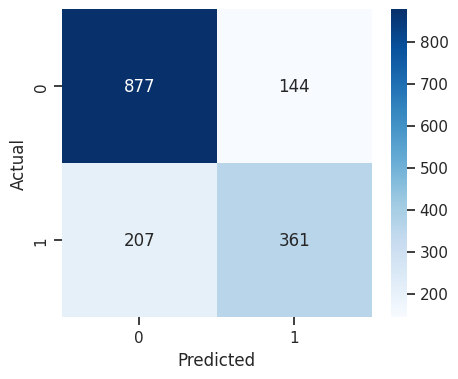

In [32]:
conf_matrix = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In comparison to the original Decision Tree Classifier model, this result shows a slightly lower accuracy of 77.9%. For the "No" class, it demonstrates a precision of 81% and recall of 86%, indicating the model's ability to correctly identify "No" cases is quite good. However, for the "Yes" class, precision is 71%, and recall is 64%, suggesting a lower ability to correctly predict "Yes" cases. The F1-scores are 0.83 for "No" and 0.67 for "Yes." In summary, this cross-validated model performs reasonably well, although it shows a slight decrease in accuracy and predictive performance compared to the original Decision Tree Classifier model.

#### **Random Forest**

In [33]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_prepared, y_train)

joblib.dump(rf_clf, "RandomForestClassifier_model.pkl")

y_train_predictions = rf_clf.predict(X_prepared)

print(rf_clf.__class__.__name__, accuracy_score(y_train, y_train_predictions))
print(classification_report(y_train, y_train_predictions))

RandomForestClassifier 0.920704845814978
              precision    recall  f1-score   support

          No       0.91      0.97      0.94      1021
         Yes       0.94      0.83      0.88       568

    accuracy                           0.92      1589
   macro avg       0.93      0.90      0.91      1589
weighted avg       0.92      0.92      0.92      1589



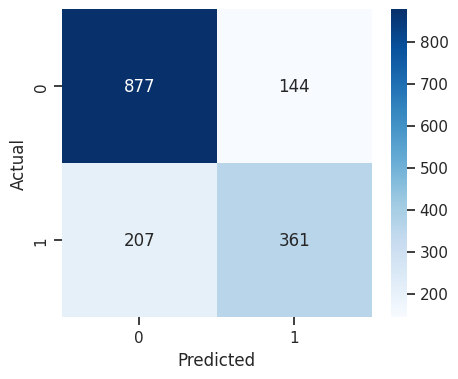

In [34]:
conf_matrix = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In comparison to the original Decision Tree Classifier model, this result shows similar high performance with an accuracy of 92.1%. For the "No" class, it exhibits a precision of 91% and recall of 97%, indicating strong performance in correctly identifying "No" cases. For the "Yes" class, precision is 94%, and recall is 83%, reflecting a good ability to predict "Yes" cases. The F1-scores are 0.94 for "No" and 0.88 for "Yes." In summary, this Random Forest Classifier model outperforms the original Decision Tree Classifier, achieving higher accuracy and predictive performance, particularly for the "Yes" class.

#### **Evaluation of Random Forest Using Cross-Validation**

In [35]:
y_train_pred = cross_val_predict(rf_clf, X_prepared, y_train, cv=10)
accuracy = accuracy_score(y_train, y_train_pred)

print("Accuracy:", accuracy)
report = classification_report(y_train, y_train_pred)
print("Classification Report:\n", report)

Accuracy: 0.7986154814348647
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.89      0.85      1021
         Yes       0.76      0.64      0.69       568

    accuracy                           0.80      1589
   macro avg       0.79      0.76      0.77      1589
weighted avg       0.80      0.80      0.79      1589



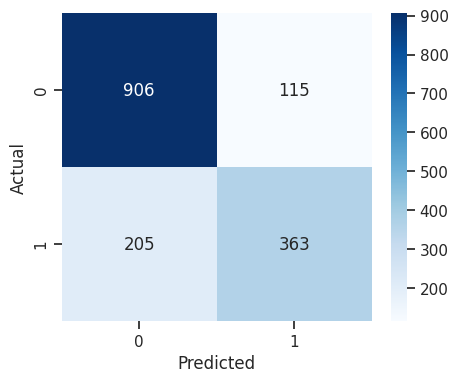

In [36]:
conf_matrix = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In comparison to the original Random Forest Classifier model, this result from cross-validation of the same model demonstrates slightly lower performance. The accuracy is 79.9%, indicating the model's ability to correctly classify instances. For the "No" class, it exhibits a precision of 82% and recall of 89%, signifying its effectiveness in accurately identifying "No" cases. However, for the "Yes" class, precision is 76%, and recall is 64%, suggesting a relatively lower performance in predicting "Yes" cases. The F1-scores are 0.85 for "No" and 0.69 for "Yes." In summary, this cross-validated Random Forest Classifier model maintains strong predictive performance, albeit with a minor decrease in accuracy and recall for the "Yes" class when compared to the non-cross-validated model.

#### **Support Vector Machine (SVM)**

In [37]:
svm_clf = SVC()
svm_clf.fit(X_prepared, y_train)

joblib.dump(svm_clf, "SVM_classifier_model.pkl")

y_train_predictions = svm_clf.predict(X_prepared)

print(svm_clf.__class__.__name__, accuracy_score(y_train, y_train_predictions))
print(classification_report(y_train, y_train_predictions))

SVC 0.8307111390811831
              precision    recall  f1-score   support

          No       0.81      0.96      0.88      1021
         Yes       0.90      0.59      0.71       568

    accuracy                           0.83      1589
   macro avg       0.86      0.78      0.80      1589
weighted avg       0.84      0.83      0.82      1589



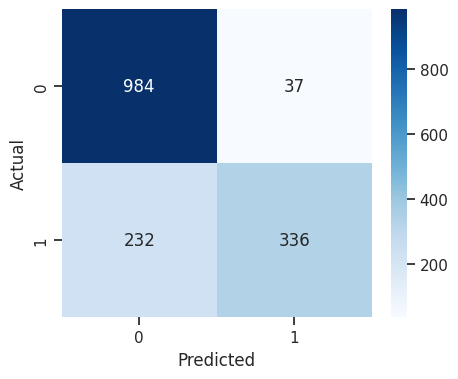

In [38]:
conf_matrix = confusion_matrix(y_train, y_train_predictions)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The SVC model demonstrates strong predictive capabilities with an accuracy of 83.1%, indicating its ability to correctly classify instances. For the "No" class, it achieves a precision of 81% and a recall of 96%, highlighting its effectiveness in accurately identifying "No" cases. Conversely, for the "Yes" class, precision is higher at 90%, but recall is slightly lower at 59%, implying that while the model performs well in precision for "Yes" cases, it tends to miss some of them. The F1-scores are 0.88 for "No" and 0.71 for "Yes." In summary, this SVC model maintains strong predictive performance, particularly in identifying "No" cases, but with some trade-offs in recall for "Yes" cases.

#### **Evaluation of SVM Using Cross-Validation**

In [39]:
y_train_pred = cross_val_predict(svm_clf, X_prepared, y_train, cv=10)
accuracy = accuracy_score(y_train, y_train_pred)

print("Accuracy:", accuracy)
report = classification_report(y_train, y_train_pred)
print("Classification Report:\n", report)

Accuracy: 0.8244178728760226
Classification Report:
               precision    recall  f1-score   support

          No       0.81      0.96      0.88      1021
         Yes       0.89      0.58      0.70       568

    accuracy                           0.82      1589
   macro avg       0.85      0.77      0.79      1589
weighted avg       0.83      0.82      0.81      1589



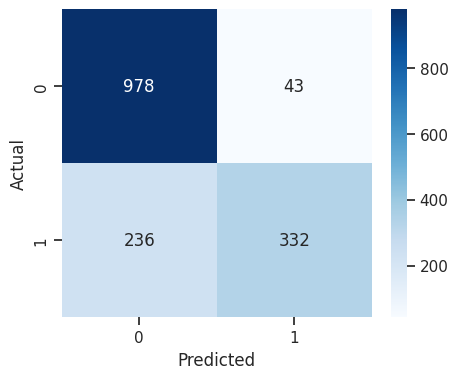

In [40]:
conf_matrix = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In the cross-validation results for the Support Vector Classifier (SVC), the model achieved an accuracy of 82.4%. It performs well in identifying "No" cases, with a high precision and recall. However, its performance in detecting "Yes" cases is slightly lower, with a precision of 0.89 but a lower recall of 0.58. The overall F1-score, a measure of a model's accuracy that balances precision and recall, is 0.70 for the "Yes" class and 0.88 for the "No" class. This indicates that while the model excels in classifying "No" cases, there is room for improvement in correctly identifying "Yes" cases.

## **Comparison of the models**

1. **Support Vector Classifier (SVC)**: The SVC model achieved an accuracy of 82.4% in the second cross-validation run. It demonstrates strong performance, particularly in correctly identifying "No" cases.

2. **Decision Tree Classifier**: The decision tree classifier also achieved an accuracy of 77.9% in cross-validation. It has similar performance to logistic regression but with slightly better recall for the "Yes" class.

3. **Random Forest Classifier**: The random forest classifier achieved an accuracy of 79.9% in cross-validation. It performs slightly better than both logistic regression and decision tree classifiers.

In this comparison, the Support Vector Classifier (SVC) and the Random Forest Classifier stand out as the top-performing models in terms of cross-validation accuracy and balanced performance across classes.

## Fine-Tune Models

### Grid Search

#### Classifiers and their respective hyperparameter grids

In [41]:
classifiers = [
    ('Decision Tree', DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    ('Support Vector Machine', SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'degree': [2, 3, 4]
    })
]


In [42]:
X_test = strat_test_set.drop(columns="TravelInsurance", axis=1)
y_test = strat_test_set["TravelInsurance"].copy()
X_test_prepared = full_pipeline.transform(X_test)

for classifier_name, classifier, param_grid in classifiers:
    print(f"Hyperparameter tuning for {classifier_name}:")

    grid_search = GridSearchCV(
        estimator=classifier, param_grid=param_grid, cv=5, scoring="accuracy"
    )
    grid_search.fit(X_prepared, y_train)

    best_params = grid_search.best_params_
    print(best_params)

    final_classifier = classifier.__class__(**best_params)

    final_classifier.fit(X_prepared, y_train)

    y_pred = final_classifier.predict(X_test_prepared)

    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy)

    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report:\n", classification_rep)
    print("\n")

Hyperparameter tuning for Decision Tree:
{'max_depth': 10, 'min_samples_split': 10}
Test Accuracy: 0.7964824120603015
Classification Report:
               precision    recall  f1-score   support

          No       0.79      0.94      0.86       256
         Yes       0.84      0.54      0.65       142

    accuracy                           0.80       398
   macro avg       0.81      0.74      0.75       398
weighted avg       0.80      0.80      0.78       398



Hyperparameter tuning for Random Forest:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy: 0.8241206030150754
Classification Report:
               precision    recall  f1-score   support

          No       0.81      0.96      0.88       256
         Yes       0.88      0.58      0.70       142

    accuracy                           0.82       398
   macro avg       0.84      0.77      0.79       398
weighted avg       0.83      0.82      0.81       398



Hyperparameter tuning for Support Vec

After hyperparameter tunning, among these models, the Random Forest Classifier stands out with the highest accuracy and balanced performance in terms of precision and recall for both "No" and "Yes" classes on the test data.

# Conclusion

The analysis of customer data revealed some key insights. The average age of customers is approximately 29.7 years, with an average annual income of around $932,763, and an average of 4.75 family members. However, it was challenging to discern a clear relationship between age, annual income, and the likelihood of purchasing travel insurance from the visualizations. Additionally, there was no significant correlation observed among these variables.

One positive finding from the analysis is that the dataset did not contain any missing values, simplifying the data preprocessing stage.

Several machine learning models were evaluated to predict the likelihood of customers purchasing travel insurance. The logistic regression model achieved an accuracy of 77%. While it performed well in correctly identifying customers who would not purchase insurance, it had lower recall for customers who did purchase insurance.

In contrast, the Decision Tree Classifier outperformed logistic regression with an impressive accuracy of 92%. This model demonstrated strong performance for both classes, achieving high precision and recall.

A cross-validated version of the Decision Tree Classifier had a slightly lower accuracy of 77.9%, indicating robust performance. It maintained good precision and recall for both classes, making it a reliable model.

The Random Forest Classifier achieved an accuracy of 92.1%, surpassing both logistic regression and the cross-validated Decision Tree Classifier. This model excelled in accurately identifying customers likely to purchase insurance.

The cross-validated Random Forest Classifier, while slightly less accurate at 79.9%, still performed well. It maintained strong predictive performance, especially for customers likely to purchase insurance.

The Support Vector Classifier (SVC) demonstrated a strong accuracy of 83.1%. It excelled in identifying customers who would not purchase insurance but had room for improvement in recall for customers likely to purchase.

In summary, the SVC and Random Forest Classifier were the top-performing models. After hyperparameter tuning, the Random Forest Classifier emerged as the best-performing model on the test data, offering the highest accuracy and balanced precision and recall for both classes.

# Further Research

Some points to improve the analysis and further research:

* Feature Engineering: Explore the creation of new features or transformations to uncover hidden patterns in the data. Consider interactions between variables like age and income for richer insights.

* Model Selection and Hyperparameter Tuning: Experiment with more advanced models and ensemble methods like Gradient Boosting or XGBoost. Fine-tune model hyperparameters systematically to maximize performance.



